In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [61]:
df = pd.read_csv("us_baby_names.csv")

In [62]:
pd.options.display.float_format   = '{:.0f}'.format

In [63]:
babies_per_year = df.groupby("Year").Count.sum()

In [64]:
babies_per_year 

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

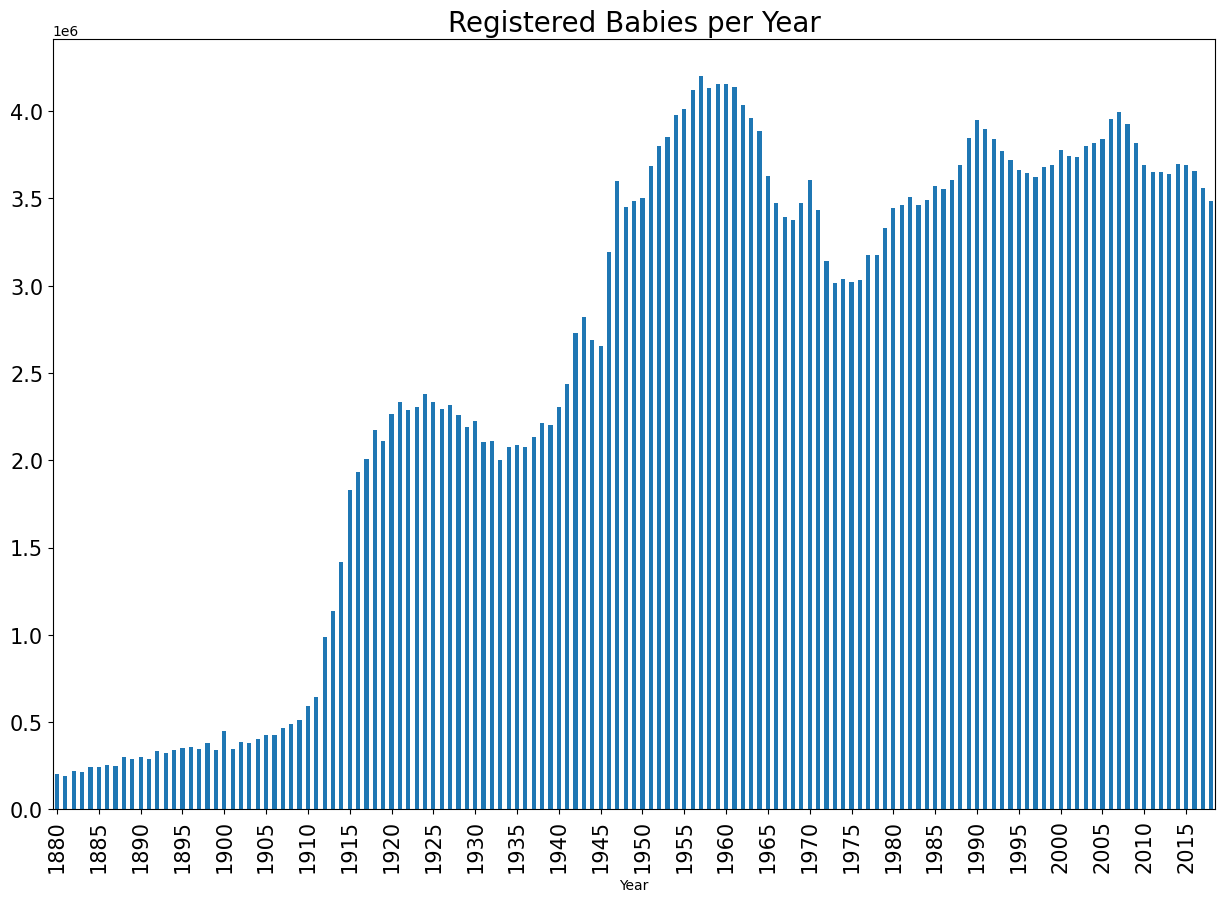

In [65]:
babies_per_year.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels =  range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

In [66]:
diff_names  =  df.groupby("Year").Name.count()

In [67]:
diff_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

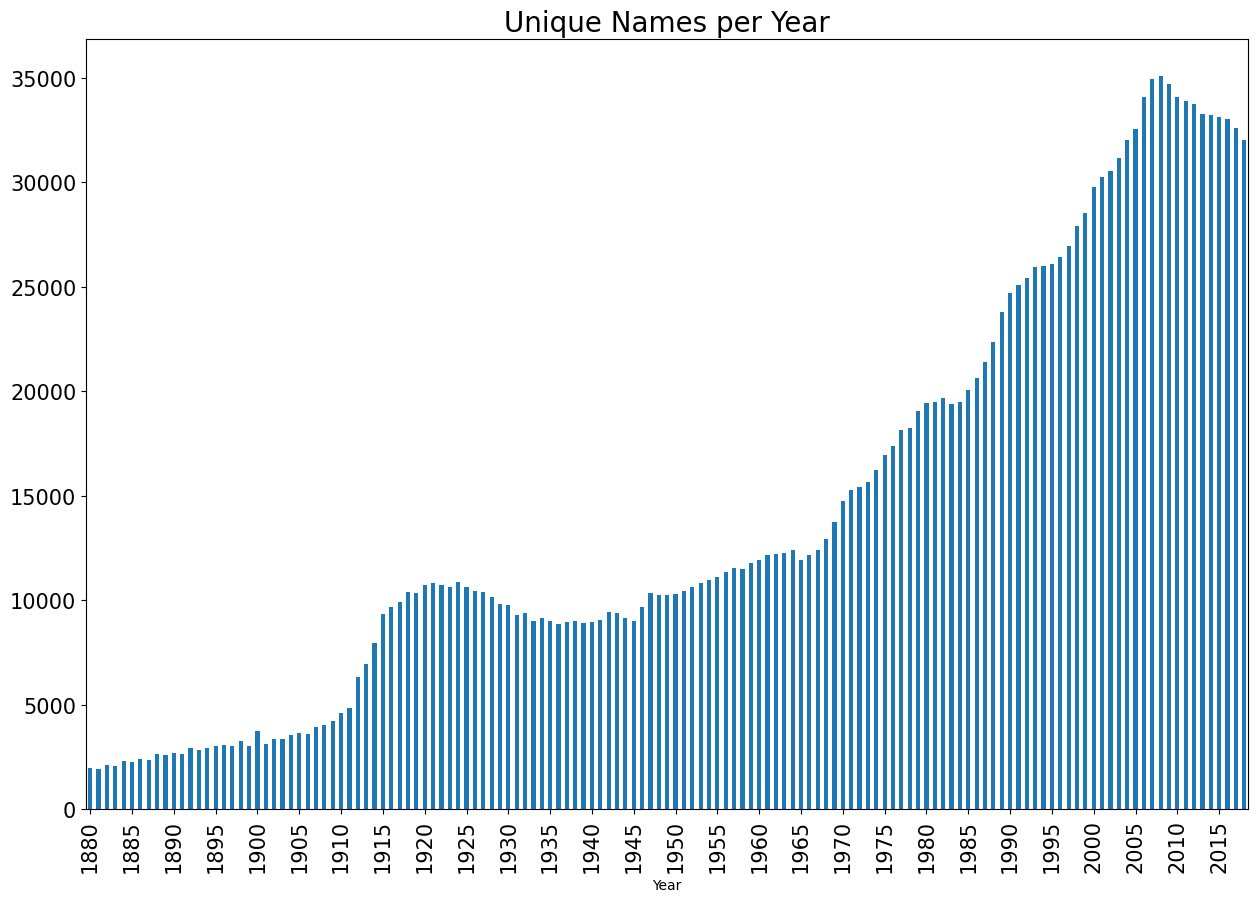

In [68]:
diff_names.plot(kind = "bar", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(diff_names), 5)), labels =  range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize = 20)
plt.show()

In [69]:
df.groupby([ "Year", "Gender"]).Count.transform("sum")

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [70]:
df.Count.div(df.groupby(["Year","Gender"]).Count.transform("sum"))*1000000

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [71]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender" ]) .Count.transform("sum")  )*1000000

In [72]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
1957041,2018,Zylas,M,5,3
1957042,2018,Zyran,M,5,3
1957043,2018,Zyrie,M,5,3
1957044,2018,Zyron,M,5,3


ranks

In [73]:
df.groupby([ "Year" , "Gender" ]) .Count.apply(lambda x : x.rank(ascending = False)  )

Year  Gender         
1880  F       0             1
              1             2
              2             3
              3             4
              4             5
                         ... 
2018  M       1957041   13042
              1957042   13042
              1957043   13042
              1957044   13042
              1957045   13042
Name: Count, Length: 1957046, dtype: float64

In [74]:
df["Rank"] = df.groupby(["Year", "Gender"])["Count"].transform(lambda x: x.rank(ascending=False))


In [75]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [76]:
df[(df.Year == 2018) & (df.Gender == "M")].tail(60)

,Year,Name,Gender,Count,Popularity,Rank
1956986,2018,Zachry,M,5,3,13042
1956987,2018,Zaeed,M,5,3,13042
1956988,2018,Zahavi,M,5,3,13042
1956989,2018,Zaheir,M,5,3,13042
1956990,2018,Zahyan,M,5,3,13042
1956991,2018,Zaidenn,M,5,3,13042
1956992,2018,Zaier,M,5,3,13042
1956993,2018,Zailyn,M,5,3,13042
1956994,2018,Zaion,M,5,3,13042
1956995,2018,Zakery,M,5,3,13042


In [77]:
df[(df.Year == 2018) & (df.Gender == "F")].head(60)

,Year,Name,Gender,Count,Popularity,Rank
1925013,2018,Emma,F,18688,11078,1
1925014,2018,Olivia,F,17921,10623,2
1925015,2018,Ava,F,14924,8847,3
1925016,2018,Isabella,F,14464,8574,4
1925017,2018,Sophia,F,13928,8256,5
1925018,2018,Charlotte,F,12940,7671,6
1925019,2018,Mia,F,12642,7494,7
1925020,2018,Amelia,F,12301,7292,8
1925021,2018,Harper,F,10582,6273,9
1925022,2018,Evelyn,F,10376,6151,10


In [78]:
df[(df.Year == 2018) & (df.Gender == "M")].Popularity.sum()

999999.9999999999

In [79]:
mary = df[(df.Name == "Mary") & (df.Gender == "F")]

In [80]:
mary.head(200)

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
2000,1881,Mary,F,6919,75245,1
3935,1882,Mary,F,8148,75551,1
6062,1883,Mary,F,8012,71333,1
8146,1884,Mary,F,9217,71439,1
...,...,...,...,...,...,...
1793168,2014,Mary,F,2632,1477,120
1826414,2015,Mary,F,2631,1478,123
1859539,2016,Mary,F,2508,1420,127
1892548,2017,Mary,F,2402,1397,126


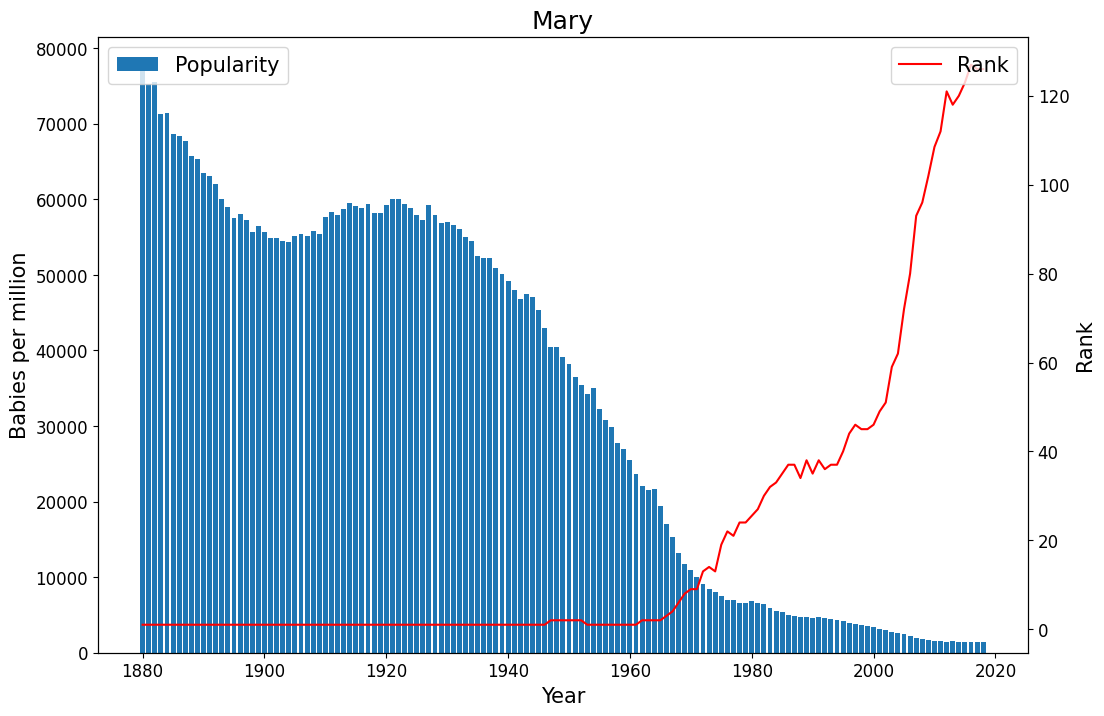

In [81]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(x = mary.Year, height= mary.Popularity, label = "Popularity")
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = "red", label = "Rank")
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per million", fontsize = 15)
ax2.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Mary", fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [92]:
def plot_name(name, gender, crit = "Popularity"):
    data = df.loc[(df.Name == name) & (df.Gender == gender), ["Name", "Gender", "Year", "Rank", crit]]
    data = data.set_index("Year")
    
    fig, ax1 = plt.subplots(figsize = (12, 8))
    ax1.bar(x = data.index, height= data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color = "red", label = "Rank")
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax2.set_ylabel("Rank", fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    ax2.legend(loc = 1, fontsize = 15)
    plt.show()

In [82]:
df.loc[(df.Name == "Mary")  & (df.Gender == "F") , "Popularity"]

0         77642
2000      75245
3935      75551
6062      71333
8146      71439
           ... 
1793168    1477
1826414    1478
1859539    1420
1892548    1397
1925138    1379
Name: Popularity, Length: 139, dtype: float64

In [83]:
df["Pop_lag1"] = df.groupby(["Name","Gender"]).Popularity.shift()

In [84]:
df

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
0,1880,Mary,F,7065,77642,1,NaN
1,1880,Anna,F,2604,28617,2,NaN
2,1880,Emma,F,2003,22012,3,NaN
3,1880,Elizabeth,F,1939,21309,4,NaN
4,1880,Minnie,F,1746,19188,5,NaN
...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4
1957042,2018,Zyran,M,5,3,13042,3
1957043,2018,Zyrie,M,5,3,13042,3
1957044,2018,Zyron,M,5,3,13042,8


In [46]:
df[df.Name == "Ashanti"]

,Year,Name,Gender,Count,Popularity,Pop_lag1
700697,1970,Ashanti,F,14,8,NaN
708512,1970,Ashanti,M,14,8,NaN
714597,1971,Ashanti,F,21,13,8
724746,1971,Ashanti,M,8,5,8
729787,1972,Ashanti,F,21,14,13
...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,103
1857597,2015,Ashanti,M,5,3,3
1860841,2016,Ashanti,F,161,91,88
1893982,2017,Ashanti,F,140,81,91


In [49]:
df.loc[(df.Year >  1880  )   & (df.Pop_lag1.isna()), "Pop_lag1"  ] = 0

In [50]:
df[df.Name == "Ashanti"]

,Year,Name,Gender,Count,Popularity,Pop_lag1
700697,1970,Ashanti,F,14,8,0
708512,1970,Ashanti,M,14,8,0
714597,1971,Ashanti,F,21,13,8
724746,1971,Ashanti,M,8,5,8
729787,1972,Ashanti,F,21,14,13
...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,103
1857597,2015,Ashanti,M,5,3,3
1860841,2016,Ashanti,F,161,91,88
1893982,2017,Ashanti,F,140,81,91


In [52]:
df["Pop_diff"] = df.Popularity - df.Pop_lag1

In [54]:
df[(df.Name  ==  "Mary"  )  & (df.Gender == "F"   )  ]

,Year,Name,Gender,Count,Popularity,Pop_lag1,Pop_diff
0,1880,Mary,F,7065,77642,NaN,NaN
2000,1881,Mary,F,6919,75245,77642,-2398
3935,1882,Mary,F,8148,75551,75245,307
6062,1883,Mary,F,8012,71333,75551,-4219
8146,1884,Mary,F,9217,71439,71333,107
...,...,...,...,...,...,...,...
1793168,2014,Mary,F,2632,1477,1514,-37
1826414,2015,Mary,F,2631,1478,1477,1
1859539,2016,Mary,F,2508,1420,1478,-58
1892548,2017,Mary,F,2402,1397,1420,-23


In [57]:
df2 = df[df.Year >= 1900].copy()

In [86]:
df2

,Year,Name,Gender,Count,Popularity,Pop_lag1,Pop_diff
52265,1900,Mary,F,16706,55724,56527,-802
52266,1900,Helen,F,6343,21158,21663,-506
52267,1900,Anna,F,6114,20394,21951,-1557
52268,1900,Margaret,F,5304,17692,18234,-542
52269,1900,Ruth,F,4765,15894,16788,-894
...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,4,-1
1957042,2018,Zyran,M,5,3,3,-0
1957043,2018,Zyrie,M,5,3,3,0
1957044,2018,Zyron,M,5,3,8,-5


In [85]:
df

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
0,1880,Mary,F,7065,77642,1,NaN
1,1880,Anna,F,2604,28617,2,NaN
2,1880,Emma,F,2003,22012,3,NaN
3,1880,Elizabeth,F,1939,21309,4,NaN
4,1880,Minnie,F,1746,19188,5,NaN
...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4
1957042,2018,Zyran,M,5,3,13042,3
1957043,2018,Zyrie,M,5,3,13042,3
1957044,2018,Zyron,M,5,3,13042,8


In [87]:
df2.nlargest(20 , "Pop_diff")

,Year,Name,Gender,Count,Popularity,Pop_lag1,Pop_diff
431066,1947,Linda,F,99689,56236,33547,22689
321479,1935,Shirley,F,42358,40398,21874,18524
922468,1983,Ashley,F,33293,19930,8775,11156
711426,1971,Jennifer,F,56783,34134,26403,7730
726721,1972,Jennifer,F,63603,41813,34134,7680
312301,1934,Shirley,F,22840,21874,14203,7671
645417,1966,Michelle,F,27151,16047,9186,6861
751941,1973,Jason,M,46683,29940,23081,6859
844807,1979,Amanda,F,31928,19890,13394,6496
696647,1970,Jennifer,F,46157,26403,19978,6425


In [90]:
df2[(df2.Pop_lag1<5)].nlargest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Pop_lag1,Pop_diff
758040,1974,Nakia,F,1134,773,5,768
808621,1977,Kizzy,F,1116,728,0,728
1060680,1989,Christop,M,1082,541,0,541
768358,1974,Nakia,M,612,389,0,389
820064,1977,Levar,M,523,318,0,318
645832,1966,Tabatha,F,500,296,3,293
1553888,2007,Jaslene,F,501,261,3,258
1223510,1996,Moesha,F,426,243,0,243
1070200,1990,Isamar,F,446,235,0,235
961890,1985,Sade,F,393,228,0,228


In [91]:
df2[df2.Name == "Nakia"]

,Year,Name,Gender,Count,Popularity,Pop_lag1,Pop_diff
749309,1973,Nakia,F,7,5,0,5
758040,1974,Nakia,F,1134,773,5,768
768358,1974,Nakia,M,612,389,0,389
774314,1975,Nakia,F,972,667,773,-106
785009,1975,Nakia,M,514,329,389,-60
...,...,...,...,...,...,...,...
1834158,2015,Nakia,F,15,8,11,-2
1854673,2015,Nakia,M,8,4,5,-1
1865530,2016,Nakia,F,21,12,8,3
1906059,2017,Nakia,F,7,4,12,-8


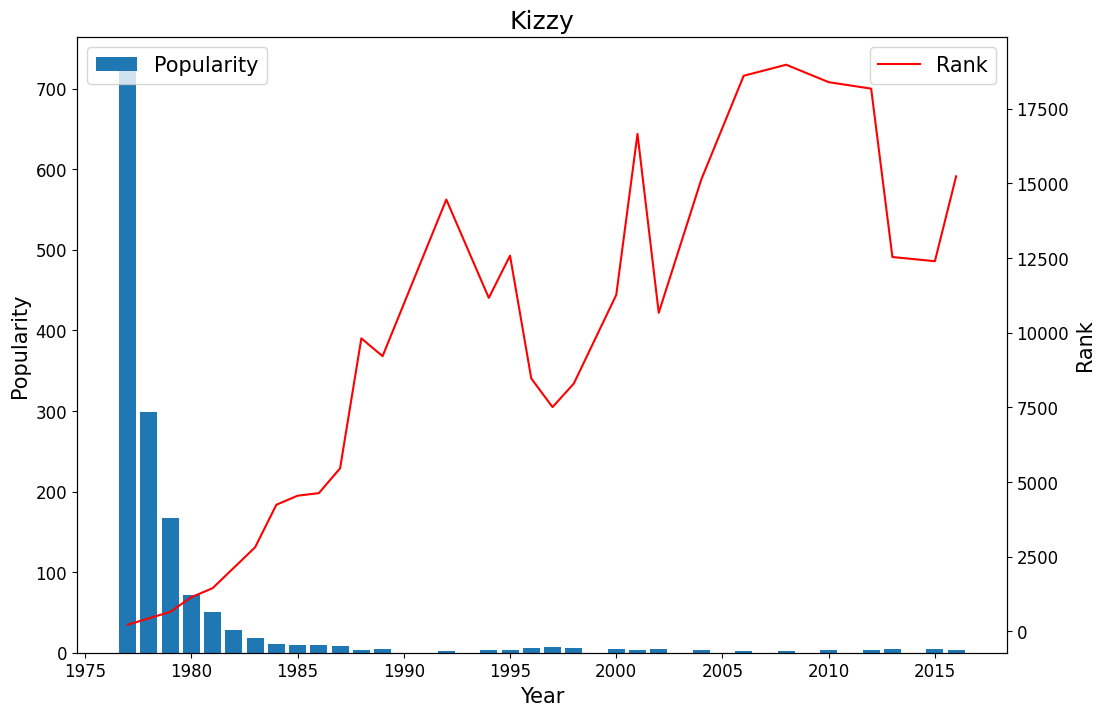

In [93]:
plot_name("Kizzy", "F")

In [94]:
df2

,Year,Name,Gender,Count,Popularity,Pop_lag1,Pop_diff
52265,1900,Mary,F,16706,55724,56527,-802
52266,1900,Helen,F,6343,21158,21663,-506
52267,1900,Anna,F,6114,20394,21951,-1557
52268,1900,Margaret,F,5304,17692,18234,-542
52269,1900,Ruth,F,4765,15894,16788,-894
...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,4,-1
1957042,2018,Zyran,M,5,3,3,-0
1957043,2018,Zyrie,M,5,3,3,0
1957044,2018,Zyron,M,5,3,8,-5


In [96]:
df2["%change"] = df2.Popularity.div(df2.Pop_lag1).sub(1).mul(100)

In [97]:
df2

,Year,Name,Gender,Count,Popularity,Pop_lag1,Pop_diff,%change
52265,1900,Mary,F,16706,55724,56527,-802,-1
52266,1900,Helen,F,6343,21158,21663,-506,-2
52267,1900,Anna,F,6114,20394,21951,-1557,-7
52268,1900,Margaret,F,5304,17692,18234,-542,-3
52269,1900,Ruth,F,4765,15894,16788,-894,-5
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,4,-1,-27
1957042,2018,Zyran,M,5,3,3,-0,-12
1957043,2018,Zyrie,M,5,3,3,0,2
1957044,2018,Zyron,M,5,3,8,-5,-66


In [98]:
df2[df2.Pop_lag1 > 1000].nsmallest(20, "%change")

,Year,Name,Gender,Count,Popularity,Pop_lag1,Pop_diff,%change
758121,1974,Katina,F,765,521,1697,-1175,-69
1119924,1992,Iesha,F,581,315,1011,-696,-69
1423744,2003,Ashanti,F,962,527,1640,-1113,-68
515370,1955,Marian,F,1499,767,2067,-1300,-63
175401,1920,Woodrow,M,774,727,1845,-1117,-61
1145180,1993,Hillary,F,1064,588,1367,-779,-57
1249716,1997,Shania,F,861,495,1047,-552,-53
54563,1900,Dewey,M,345,2293,4698,-2406,-51
275072,1930,Jeannine,F,593,527,1060,-533,-50
981635,1986,Sheena,F,1573,917,1780,-863,-48


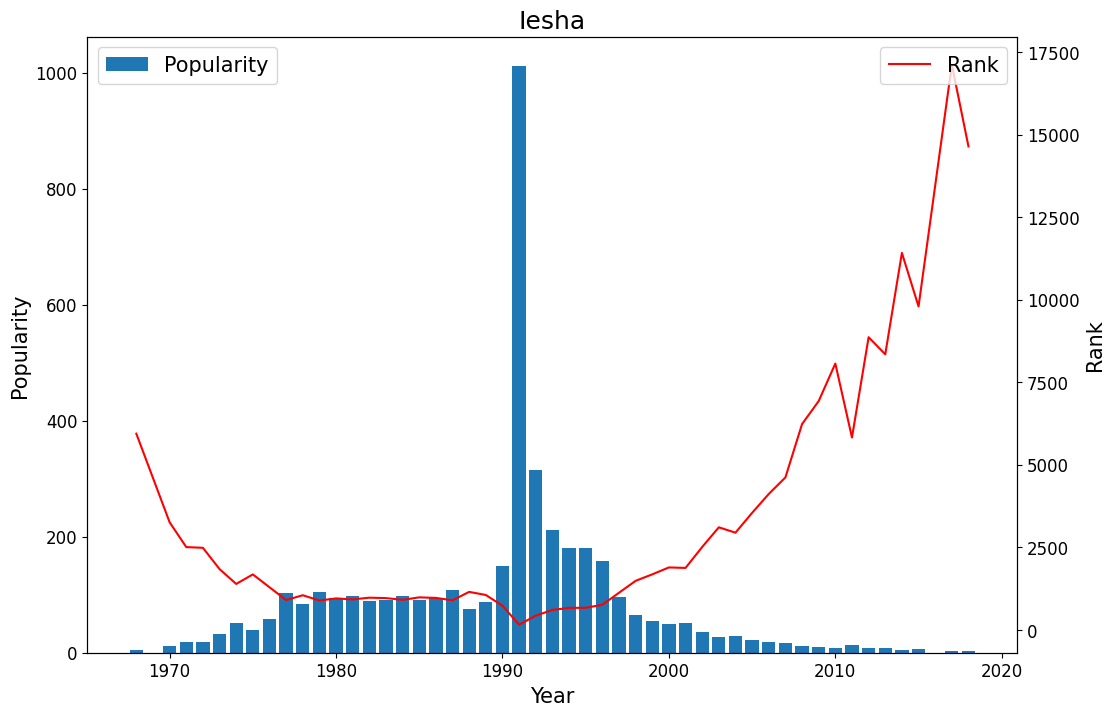

In [99]:
plot_name("Iesha", "F")

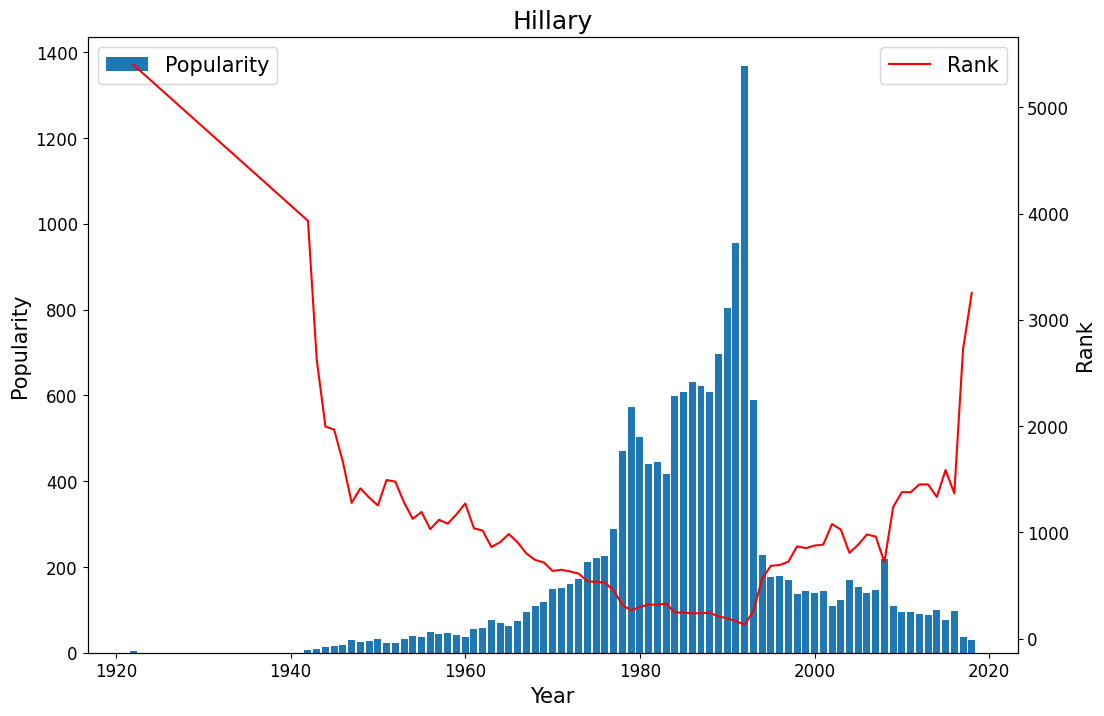

In [100]:
plot_name("Hillary", "F")

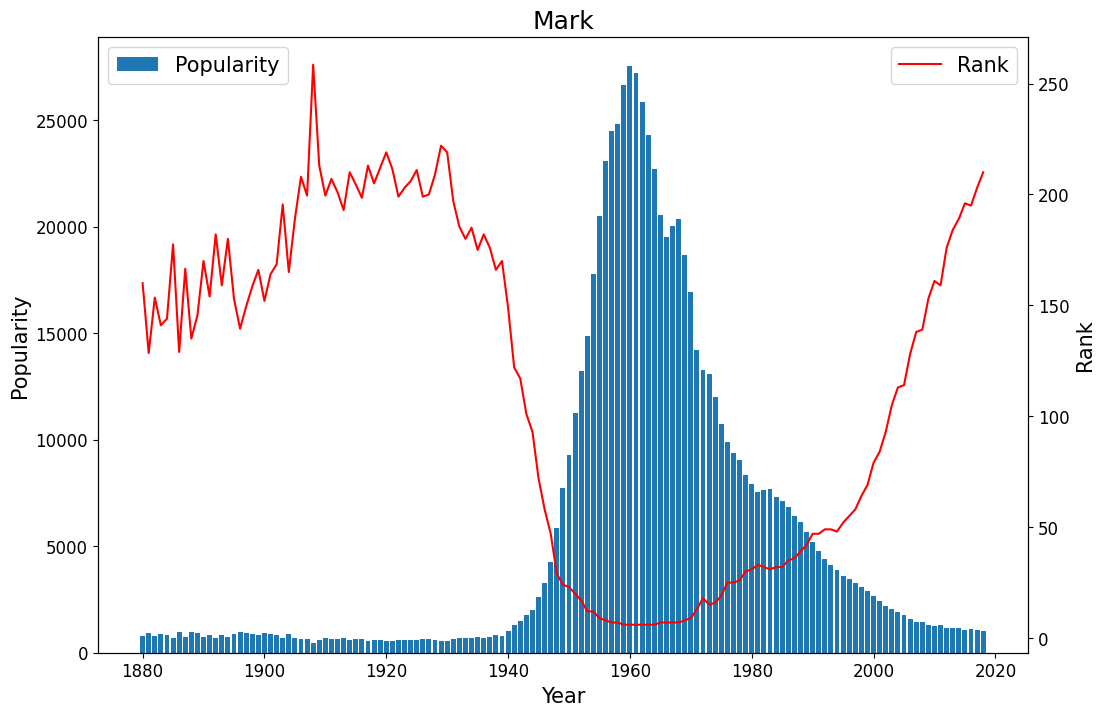

In [102]:
plot_name("Mark", "M")

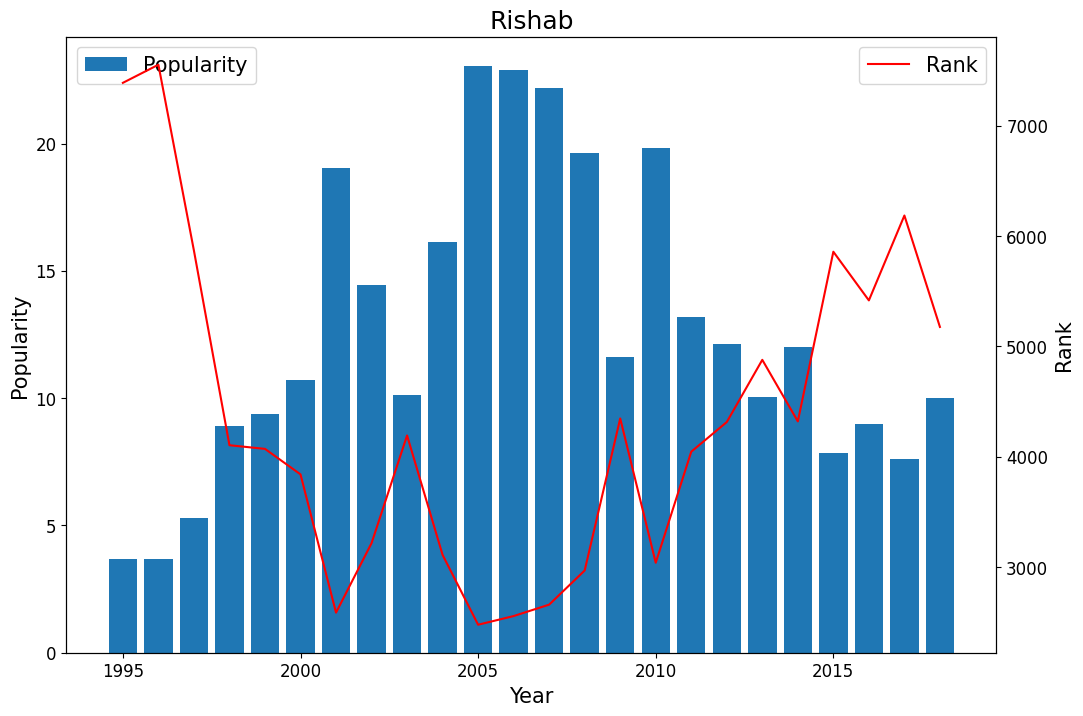

In [107]:
plot_name("Rishab", "M")

In [108]:
agg

NameError: name 'agg' is not defined

In [109]:
df

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
0,1880,Mary,F,7065,77642,1,NaN
1,1880,Anna,F,2604,28617,2,NaN
2,1880,Emma,F,2003,22012,3,NaN
3,1880,Elizabeth,F,1939,21309,4,NaN
4,1880,Minnie,F,1746,19188,5,NaN
...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4
1957042,2018,Zyran,M,5,3,13042,3
1957043,2018,Zyrie,M,5,3,13042,3
1957044,2018,Zyron,M,5,3,13042,8
